In [1]:
from rtlsdr import RtlSdr
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, periodogram, welch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sdr = RtlSdr()

Detached kernel driver
Found Rafael Micro R820T tuner
[R82XX] PLL not locked!


In [3]:
fs = 2000000;
sdr.set_sample_rate(fs)
sdr.set_center_freq(91.5e6)
N_Samples = 1024000

Exact sample rate is: 2000000.052982 Hz


In [4]:
data = sdr.read_samples(N_Samples)

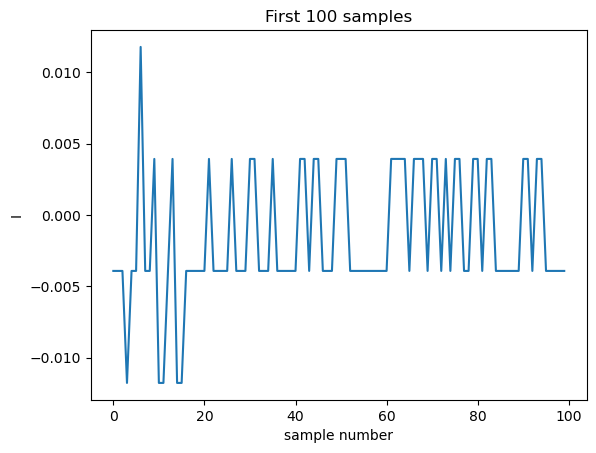

In [5]:
plt.plot(data[:100].real)
plt.xlabel('sample number')
plt.ylabel('I')
plt.title(f'First 100 samples')
plt.show()

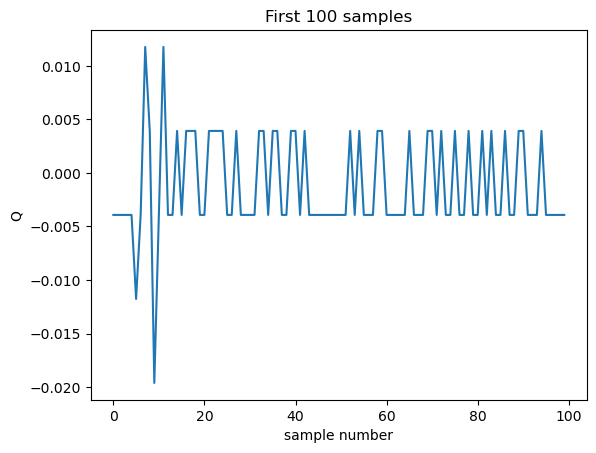

In [6]:
plt.plot(data[:100].imag)
plt.xlabel('sample number')
plt.ylabel('Q')
plt.title(f'First 100 samples')
plt.show()

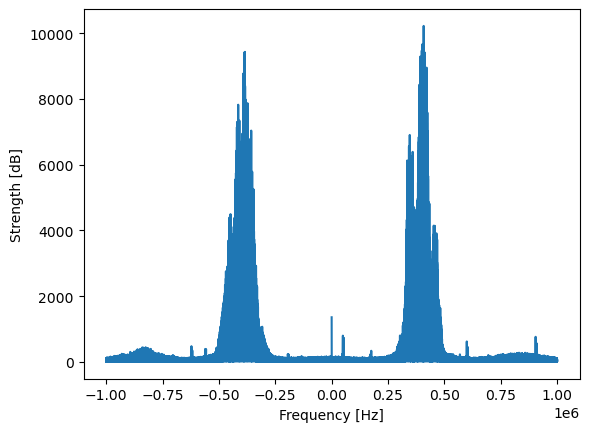

In [7]:
yf = fft(data)
xf = fftfreq(data.shape[0], 1 / fs)
plt.ylabel('Strength [dB]')
plt.xlabel('Frequency [Hz]')
plt.plot(xf, np.abs(yf))
plt.show()

/usr/lib/python3/dist-packages/scipy/signal/_spectral_py.py:1814: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


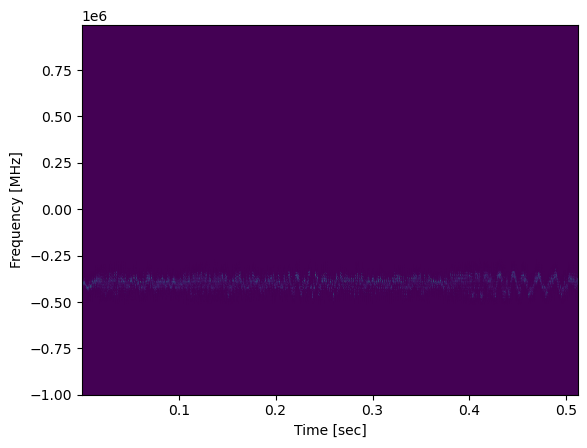

In [8]:
# Spectrogram
f, t, Sxx = spectrogram(data, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [MHz]')
plt.xlabel('Time [sec]')
plt.show()

/usr/lib/python3/dist-packages/scipy/signal/_spectral_py.py:1814: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


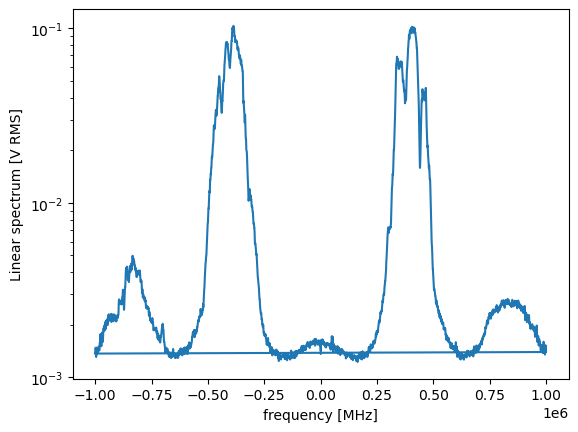

In [10]:
f, Pxx_spec = welch(data, fs, 'flattop', 4096, scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [MHz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()